1.  What is Simple Linear Regression?
  - Simple linear regression: A model that relates a response variable Y to an input variable x by the equation. Y = α + β x + e. The quantities α and β are parameters of the regression model, and e is an error random variable. Dependent variable: Another term for the response variable.

2. What are the key assumptions of Simple Linear Regression?
  - Linearity: The relationship between the independent and dependent variables must be linear. If the relationship is non-linear, the model won’t capture it well.
  - Independence of Errors: Residuals should be independent of each other. This means there should be no patterns or correlations between the residuals. This is something to watch for closely in time-ordered data.
  - Homoscedasticity: The residuals should have constant variance across all values of the independent variable. If the variance changes (heteroscedasticity), predictions in certain ranges of x may become less accurate.
  - Normality of Residuals: Residuals should ideally follow a normal, or Gaussian distribution. This is important for statistical testing, and asserting levels of confidence in our estimate. It’s less critical for making predictions.

3. What is heteroscedasticity, and why is it important to address in regression models?
  - Heteroscedasticity is a term used in regression analysis that describes a situation where the variance of the residuals (the differences between the observed values and the values predicted by the model) is unequal across the range of measured values for the independent variable(s).
  - Invalid Standard Errors: The standard errors of the coefficient estimates will be biased and inconsistent. This means they are unreliable for hypothesis testing and constructing confidence intervals. You might incorrectly conclude that a variable is statistically significant when it is not, or vice versa.
  - Inefficient Estimates: While the coefficient estimates themselves remain unbiased, they are no longer the "best" or most efficient. This means there is another estimator that has a smaller variance, making your model less precise.

  - Unreliable p-values: Since the standard errors are incorrect, the p-values and t-statistics derived from them will also be wrong, which can lead to drawing flawed conclusions about the relationships between your variables.

4.  What is Multiple Linear Regression?
  - Multiple linear regression is a statistical technique used to model the relationship between a single dependent variable and two or more independent variables. It's an extension of simple linear regression, which only considers one independent variable.

5.  What is polynomial regression, and how does it differ from linear regression?
  - Polynomial regression is a type of regression analysis where the relationship between the independent variable (x) and the dependent variable (y) is modeled as an nth degree polynomial. Instead of fitting a straight line, it fits a curve to the data.

    - Linear Regression: This technique assumes and models a straight-line relationship between the variables. It is suitable for data where a single-unit change in the independent variable leads to a constant change in the dependent variable.
    - Polynomial Regression: This technique models a curvilinear relationship. It is used when a linear model is not sufficient to capture the pattern in the data, and the relationship between the variables is non-linear. The degree of the polynomial (k) determines the complexity of the curve.

6.  Implement a Python program to fit a Simple Linear Regression model to the following sample data:
  -  X = [1, 2, 3, 4, 5]
  -  Y = [2.1, 4.3, 6.1, 7.9, 10.2]
      - Plot the regression line over the data points.

Intercept (β₀): 0.1800
Slope (β₁): 1.9800


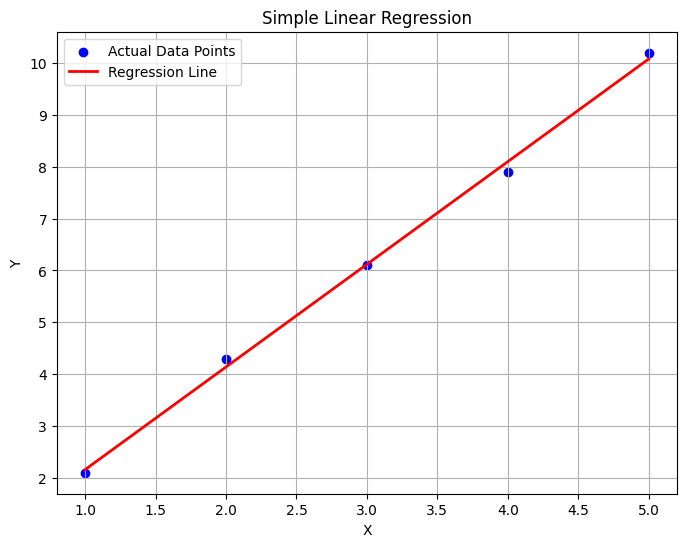

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

model = LinearRegression()
model.fit(X, Y)

Y_pred = model.predict(X)

intercept = model.intercept_
slope = model.coef_[0]

print(f"Intercept (β₀): {intercept:.4f}")
print(f"Slope (β₁): {slope:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', label='Actual Data Points')
plt.plot(X, Y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Simple Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

7.  Fit a Multiple Linear Regression model on this sample data:
  -  Area = [1200, 1500, 1800, 2000]
  -  Rooms = [2, 3, 3, 4]
  -  Price = [250000, 300000, 320000, 370000]
      - Check for multicollinearity using VIF and report the results.

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

data = {
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
}
df = pd.DataFrame(data)

X = df[['Area', 'Rooms']]
y = df['Price']

model = LinearRegression()
model.fit(X, y)

intercept = model.intercept_
coefficients = model.coef_

print("Model Coefficients:")
for feature, coef in zip(X.columns, coefficients):
    print(f"  {feature}: {coef:.2f}")
print(f"Intercept: {intercept:.2f}")

vif_data = pd.DataFrame()
vif_data['features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print("\nMulticollinearity Check (VIF):")
print(vif_data)

Model Coefficients:
  Area: 63.16
  Rooms: 34736.84
Intercept: 103157.89

Multicollinearity Check (VIF):
  features         VIF
0     Area  127.796923
1    Rooms  127.796923


8. Implement polynomial regression on the following data:
  -  X = [1, 2, 3, 4, 5] 3
  -  Y = [2.2, 4.8, 7.5, 11.2, 14.7]
      - Fit a 2nd-degree polynomial and plot the resulting curve.

Coefficients: [1.94 0.2 ]
Intercept: 0.0600000000000005


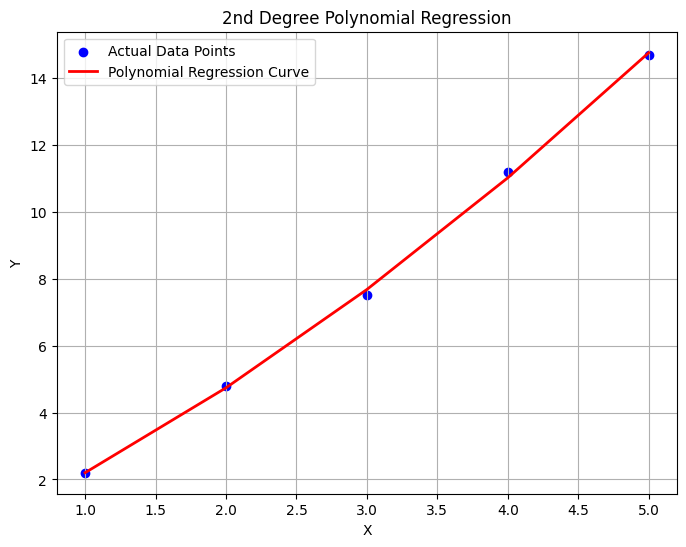

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, Y)

Y_pred = model.predict(X_poly)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', label='Actual Data Points')
plt.plot(X, Y_pred, color='red', linewidth=2, label='Polynomial Regression Curve')
plt.title('2nd Degree Polynomial Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

9. Create a residuals plot for a regression model trained on this data:
  -  X = [10, 20, 30, 40, 50]
  -  Y = [15, 35, 40, 50, 65]
      - Assess heteroscedasticity by examining the spread of residuals.

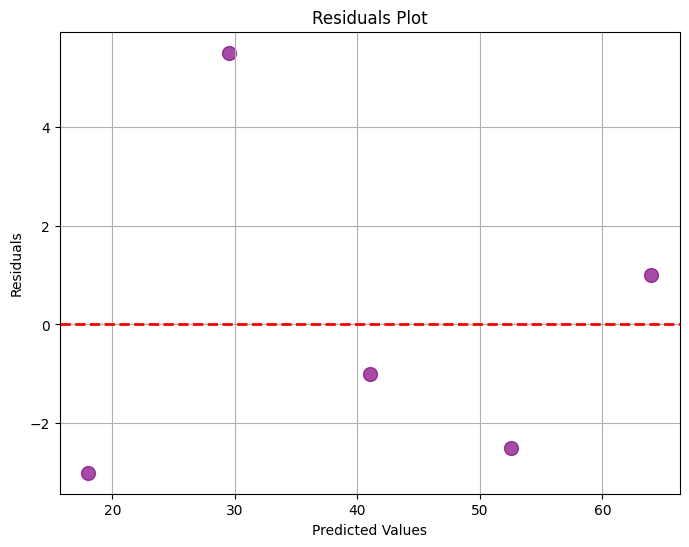

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

model = LinearRegression()
model.fit(X, Y)

Y_pred = model.predict(X)
residuals = Y - Y_pred

plt.figure(figsize=(8, 6))
plt.scatter(Y_pred, residuals, color='purple', s=100, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

10. Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location. However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.

  - As a data scientist, you'd follow a systematic approach to address heteroscedasticity and multicollinearity to build a reliable house price prediction model.

1. Addressing Heteroscedasticity
Heteroscedasticity means the variance of the errors is not constant across the range of house prices. This doesn't bias your coefficient estimates, but it makes them inefficient and their standard errors unreliable, invalidating hypothesis tests and confidence intervals.

Here are the steps to address it:

  - Robust Standard Errors: The most common and straightforward approach is to use robust standard errors (also known as White's or Huber-White standard errors). This method doesn't change your model coefficients but corrects the standard errors, making them valid even with heteroscedasticity. It's often a quick and effective solution, especially if your primary goal is accurate inference.

  - Data Transformation: You could apply a transformation to the dependent variable (Price). A common transformation is taking the natural logarithm of the house prices (ln(Price)). This can often stabilize the variance of the residuals and can also make the relationship between the features and the price more linear.

  - Weighted Least Squares (WLS): If you can identify the pattern of the heteroscedasticity, WLS can be used. This method assigns less weight to observations with larger variances, thereby giving more weight to observations with smaller variances. This makes the coefficient estimates more efficient.

2. Addressing Multicollinearity
Multicollinearity occurs when independent variables are highly correlated with each other (e.g., Area and Number of Rooms). This makes it difficult to interpret the individual effect of each feature and can lead to unstable and inflated coefficient estimates.

  - Variable Selection: If two variables are highly correlated, you could remove one of them from the model. For instance, if Area and Number of Rooms have a VIF (Variance Inflation Factor) over 10, you might decide to keep only Area if it's considered a more important or interpretable feature.

  - Create a Composite Variable: Instead of using both highly correlated variables, you could create a new variable that combines them. For example, you could calculate a metric like "price per room" or "price per square foot" and use that as a feature.

  - Dimensionality Reduction: Techniques like Principal Component Analysis (PCA) can be used to combine the correlated variables into a smaller set of uncorrelated components. These components can then be used as the new independent variables in your regression model. While this solves the multicollinearity problem, it can make the model's coefficients harder to interpret.

  - Regularization Techniques: Ridge regression is a popular regularization method that adds a penalty to the model's loss function to shrink the coefficients. This helps in reducing the instability caused by multicollinearity. While it doesn't remove the multicollinearity, it mitigates its harmful effects on the model's coefficients.

After addressing both issues, you would re-fit the model and re-evaluate its performance to ensure it is robust, reliable, and interpretable.